# Preparing the Environment for Exploratory Data Analysis

In [23]:
# Imports of Models & libraries. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import nltk
import os
import string   
import re

from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.validation import column_or_1d
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm
from collections import Counter
from nltk import PorterStemmer
from scipy.ndimage import gaussian_gradient_magnitude
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
from collections import Counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


import warnings
warnings.filterwarnings('ignore')

In [24]:
# Load the CSV file(s).
counts = pd.read_csv('Bicycle_Counts.csv')
parking = pd.read_csv('Bicycle_Parking.csv')
routes = pd.read_excel('Bicycle_Routes.xlsx')

# View the DataFrame, metadata, shape
counts.info()
parking.info()
routes.info()

# Counts is a large but simple Df containing the number of bicycles passing through a counter
# Parking contains geographic details of bicycle racks in the city of NY
# Routes contains geographic details of list of bike lanes and routes in the city of NY

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4167507 entries, 0 to 4167506
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      int64 
 1   date    object
 2   counts  int64 
 3   status  int64 
dtypes: int64(3), object(1)
memory usage: 127.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30178 entries, 0 to 30177
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   BoroCode    30178 non-null  int64 
 1   BoroName    30178 non-null  object
 2   CounDist    30178 non-null  int64 
 3   AssemDist   30178 non-null  int64 
 4   StSenDist   30178 non-null  int64 
 5   CongDist    30178 non-null  int64 
 6   STREETON    17710 non-null  object
 7   XSTREET1    21881 non-null  object
 8   XSTREET2    21771 non-null  object
 9   SIDE        18395 non-null  object
 10  ASSETSUBTY  30178 non-null  object
dtypes: int64(5), object(6)
memory usage: 2.5+ MB
<class 'pandas.core.frame.DataFrame'>

In [ ]:
# Check for missing values
counts.isnull().sum()

# No missing values

In [ ]:
# Check for missing values
parking.isnull().sum()

# Lots of missing values in several columns
# Looks like address/geographical data

In [ ]:
# Check for missing values
routes.isnull().sum()

# Missing value in just one column
# Looks like geographic location details again

In [ ]:
# Create summary of descriptive statistics.
counts.describe()

# Pretty meaningless except to confirm we are working with a large number of rows here.

In [ ]:
# Create summary of descriptive statistics.
parking.describe()

In [ ]:
# Create summary of descriptive statistics.
routes.describe()

In [ ]:
# Worth looking for outliers using K-Means Clustering in the count data
# Otherwise data was pre-wrangled and looks to be good shape 
# Need to explore how to look for outliers in geospatial data. 
# Discuss with team

# Outlier Detection

## Counts DataFrame

In [26]:
# Ensuring date data is correctly parsed
counts['date'] = pd.to_datetime(counts['date'])

In [27]:
# Check output
counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4167507 entries, 0 to 4167506
Data columns (total 4 columns):
 #   Column  Dtype         
---  ------  -----         
 0   id      int64         
 1   date    datetime64[ns]
 2   counts  int64         
 3   status  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 127.2 MB


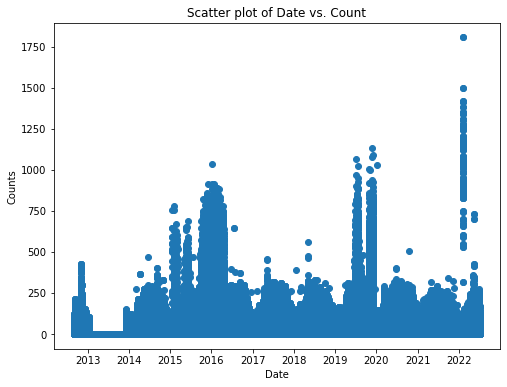

In [28]:
# Data Visualisation to determine clusters
plt.figure(figsize=(8,6))
plt.scatter(counts.date, counts.counts)
plt.xlabel('Date')
plt.ylabel('Counts')
plt.title('Scatter plot of Date vs. Count')
plt.show()

# Vis is not clear. 
# Need to run alternative clustering check

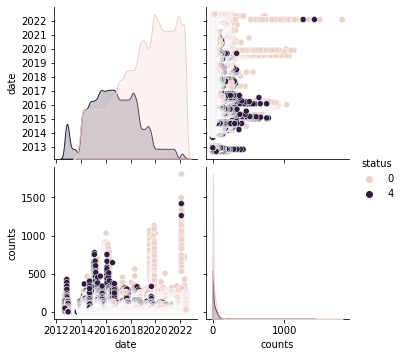

In [29]:
# Create a pairplot
# Create a pairplot between variables with Seaborn.
x = counts[['date', 'counts']]
sns.pairplot(counts, vars=x, hue='status', diag_kind='kde')

# Better output but still not particularly revealing
# Try a statistical method to explore if any clusters within the data can be identified

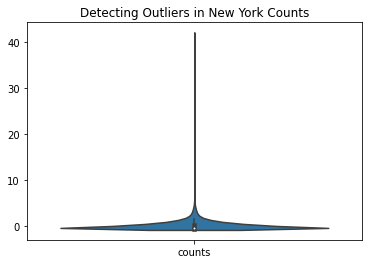

In [32]:
# Use Violinplots to both visualise outliers and their quality
# Remove unnecessary columns & standardise the data to reduce scalar effects
counts2 = counts.drop(['date', 'id', 'status'], axis=1)
# Standardise
ss = StandardScaler()
counts2 = pd.DataFrame(ss.fit_transform(counts2), columns=['counts'])

# Set out the plot.
g=sns.violinplot(data=counts2, showmedians=True, showmeans=True)
g.set_title('Detecting Outliers in New York Counts')

# Show plot
plt.show()

# Very long tail
# Discuss with team how to deal with this.

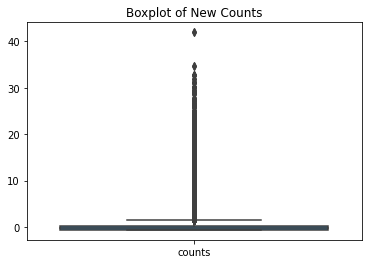

In [33]:
# Try a boxplot
g=sns.boxplot(data=counts2)
g.set_title('Boxplot of New Counts')
plt.show()